In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'axes.labelsize': 'large'
})

 # Wheatstonov most


Po električnem prevodniku, na katerega je pritisnjena napatost $U$, teče električni tok $I$. Velja Ohmov zakon

$$R = \frac{U}{I}.$$

Za upornik s konstantnim presekom pa posebej velja

$$R = \frac{\zeta l}{S},$$

kjer je $S$ presek, $l$ dolžina uporanika in $\zeta$ specifična upornost materiala. Upor lahko natančno merimo z Wheatstonovim mostom, na katerem primerjamo napetosti v dveh tokovnih vejah.

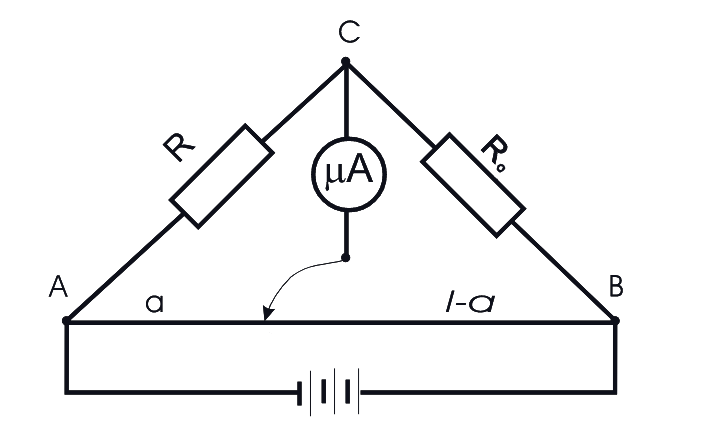

Na skici je konkretna izvedba, ki jo uporabljamo za eksperiment. Med točkama $A$ in $B$ je uporna žica, ki jo na dva dela razdelimo s kontaktno točko. Tok skozi ampermeter je torej $0$, ko velja

$$\frac{R}{a} = \frac{R_0}{l - a}.$$

## Namen

Izmeriti upor upornika in žice in določiti specifični upor žice.

## Pribor

Ravnilo z merilno žico in drsnikom, usmernik, uporovna dekada, ampermeter, žice, merjena upornik in žica.

## Meritve

Izmerimo, da je celotna dolžina žice 100.3 cm $\pm$ 1 mm (ni popolnoma napeta).

In [2]:
l, Δl = 100.3e-2, 1e-3

Za siv upornik pri različnih nastavitvah uporovne dekade $R_0$ izmerimo ničelno točko pri $a_1$, kjer tok ne teče. Nato zamenjamo uporovno dekado in siv upor in spet izmerimo ničelno točko, tokrat pri $a_2$.

In [3]:
siv_R_0 = 1e3 * np.array([
    25, 15, 7, 6, 4, 2, 1
])
siv_a_1, siv_a_2 = 1e-2 * np.array([
    [84.5, 76.5, 63.2, 56.2, 45.6, 29.8, 17.4],
    [16.2, 24.1, 39.5, 44.5, 54.4, 70.6, 83.0]
])

Enake meritve zdaj ponovimo z uporovno žico.

In [4]:
zica_R_0 = np.array([
    10, 8, 6, 5, 4, 2, 0.5
])
zica_a_1, zica_a_2 = 1e-2 * np.array([
    [64.4, 59.3, 52.5, 48.2, 43.1, 29.6, 12.5],
    [36.0, 40.9, 47.6, 51.7, 56.9, 71.0, 87.3]
])

Za uporovno žico izmerimo še dimenzije. Izmerimo premer 501 μm $\pm$ 0.5 μm in dolžino 105 cm $\pm$ 5 mm.

In [5]:
d, Δd = 501e-6, 0.5e-6
l_R, Δl_R = 105e-2, 5e-3

## Račun

Če Ohmov zakon drži, je upornost

$$R = R_0 \left( \frac{a_1}{l - a_1} \right) = R_0 \left( \frac{l - a_2}{a_2} \right).$$

### Siv upor

Odvisnost med znanim uporom in razmerjem, ki razdeljuje merilno žico narišemo. Prvo pogledamo meritve za siv upor. Najprej meritve $a_1$, nato še $a_2$, z obrnjenima znanim in merjenim uporom.

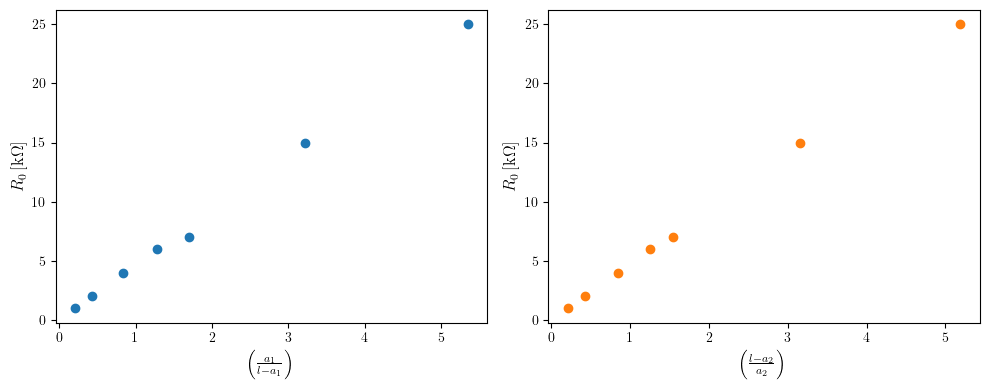

In [6]:
fig, axs = plt.subplots(1, 2, figsize=[10, 4])

axs[0].scatter(siv_a_1 / (l - siv_a_1), 1e-3 * siv_R_0, label='meritve')
axs[1].scatter((l - siv_a_2) / siv_a_2, 1e-3 * siv_R_0, color='tab:orange')

axs[0].set_xlabel(r'$\left( \frac{a_1}{l - a_1} \right)$')
axs[0].set_ylabel(r'$R_0\,[\mathrm{k\Omega}]$')
axs[1].set_xlabel(r'$\left( \frac{l - a_2}{a_2} \right)$')
axs[1].set_ylabel(r'$R_0\,[\mathrm{k\Omega}]$')
fig.tight_layout()

plt.show()

Naklon premice skozi točke na grafu je kar upornost sivega upora $R$.

In [7]:
par_1, cov_1 = np.polyfit(siv_a_1 / (l - siv_a_1), siv_R_0, 1, cov=True)
par_2, cov_2 = np.polyfit((l - siv_a_2) / siv_a_2, siv_R_0, 1, cov=True)
siv_R, siv_σ_R = 0.5 * (par_1[0] + par_2[0]), 0.5 * (np.sqrt(cov_1[0,0] + cov_2[0,0]))
siv_R, siv_σ_R

(4741.124042202557, 49.76436225185184)

Povprečimo vrednosti upora in njuni napaki iz navadne in obrnjene meritve. Upornost sivega upora je torej

$$R = 4.74 \pm 0.05\,\mathrm{k\Omega}.$$

### Uporovna žica

Enako storimo za meritve z uporno žico.

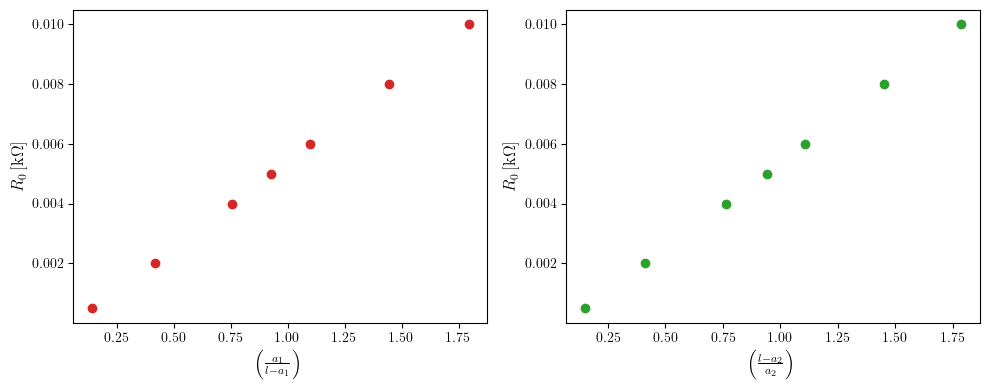

In [8]:
fig, axs = plt.subplots(1, 2, figsize=[10, 4])

axs[0].scatter(zica_a_1 / (l - zica_a_1), 1e-3 * zica_R_0, label='meritve', color='tab:red')
axs[1].scatter((l - zica_a_2) / zica_a_2, 1e-3 * zica_R_0, color='tab:green')

axs[0].set_xlabel(r'$\left( \frac{a_1}{l - a_1} \right)$')
axs[0].set_ylabel(r'$R_0\,[\mathrm{k\Omega}]$')
axs[1].set_xlabel(r'$\left( \frac{l - a_2}{a_2} \right)$')
axs[1].set_ylabel(r'$R_0\,[\mathrm{k\Omega}]$')
fig.tight_layout()

plt.show()

Iz naklonov spet izračunamo upornosti in povprečimo vrednosti in njuni napaki iz navadne in obrnjene meritve.

In [13]:
par_1, cov_1 = np.polyfit(zica_a_1 / (l - zica_a_1), zica_R_0, 1, cov=True)
par_2, cov_2 = np.polyfit((l - zica_a_2) / zica_a_2, zica_R_0, 1, cov=True)
zica_R, zica_σ_R = 0.5 * (par_1[0] + par_2[0]), 0.5 * (np.sqrt(cov_1[0,0] + cov_2[0,0]))
zica_R, zica_σ_R

(5.786431549939504, 0.01785826502280475)

Upornost cele uporovne žice je torej

$$R = 5.79 \pm 0.02\,\mathrm{\Omega}.$$

Specifično upornost materiala, iz katerega je žica, pa izračunamo kot

$$\zeta = \frac{S}{l_R}R.$$

Pri tem vzamemo, da je presek žice okrogel, torej je $S = \frac{\pi d^2}{4}$.

In [14]:
S = np.pi*(d/2)**2
ζ = zica_R*S / l_R
ζ

1.0863927384300418e-06

Zapišemo odvode po spremenljivkah z napako.

$$\mathop{\partial_R} \zeta = \frac{S}{l_R},$$
$$\mathop{\partial_d} \zeta = \frac{2\pi d}{l_R} R,$$
$$\mathop{\partial_{l_R}} \zeta = -\frac{S}{l_R^2} R.$$

in poračunamo ter seštejemo prispevke k napaki.

In [11]:
from_R = (S/l_R * zica_σ_R)**2
from_d = ((2*np.pi*d / l_R) * Δd)**2
from_l_R = (S/l_R**2 * Δl_R)**2
from_R, from_d, from_l_R

(1.1241663869792098e-17, 2.246966507281478e-18, 7.993067464486372e-19)

In [15]:
np.sqrt(from_R + from_d + from_l_R)

3.779938772456799e-09

Specifična upornost materiala, iz katerega je narejena žica, je torej

$$\zeta = 1.086 \pm 0.003\,\mathrm{\mu\Omega m^{-1}}.$$